In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import RandomizedSearchCVa
pd.set_option('display.float_format', lambda x: '%0.3f' % x)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('4W_SOLD_DATA_IN_MODEL_FORMAT_JAN_TO_15MAY_2023updated25may.csv')

In [3]:
df.head()

,SR.NO,SOURCE,UNIQUESAERIALNO,SEGMENT,SOLD_DATE,MAKEYEAR,CLEANEDMAKE,CLEANEDModel,CLEANEDVARIANT,CLEANEDFUELTYPE,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CC,SOLDAMOUNT,STATE_MAPPED,VEHICLENO,METERREADING,VEHICLECONDITION,SELLER SEGMENT
0,1,SAMIL,SA23020300223,4W,11-02-2023,2012,HYUNDAI,I10,1.1 ERA,PETROL,HATCHBACK,COMPACTHATCHBACK,4,1086CC,125000,KERALA,KL35D4119,78584,MOVABLE,RETAIL
1,2,SAMIL,SA22122000163,4W,24-01-2023,2010,TOYOTA,INNOVA,G4,DIESEL,MUV,UV2,4,2494CC,277000,PUNJAB,PB11CF1734,248727,MOVABLE,RETAIL
2,3,SAMIL,SA23030800014,4W,25-03-2023,2015,MARUTI SUZUKI,WAGON R,VXI,PETROL,HATCHBACK,MINI,4,998CC,160000,KERALA,KL48H0144,147125,MOVABLE,BANK&NBFC
3,4,SAMIL,SA22111000515,4W,25-01-2023,2018,TOYOTA,ETIOS,GD,DIESEL,SEDAN,COMPACTSEDAN,4,1364CC,557000,ANDHRAPRADESH,AP07DW3267,55500,MOVABLE,BANK&NBFC
4,5,SAMIL,SA23032401008,4W,25-03-2023,2006,FORCE MOTORS,TRAX,CRUISER PS,DIESEL,MUV,UV1,4,2596CC,310000,MAHARASHTRA,MH28C4581,188760,MOVABLE,RETAIL


In [4]:
df.rename(columns={'MAKEYEAR':'MAKE_YEAR','CLEANEDMAKE':'Make_Clean','CLEANEDModel':'Model_Clean','CLEANEDVARIANT':'Variant_Clean','CLEANEDFUELTYPE':'Fuel_Clean','STATE_MAPPED':'CV_State_Clean','SELLER SEGMENT':'SELLER_SEGMENT'},inplace=True)

In [5]:
#['MAKE_YEAR','Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','SELLER_SEGMENT','METERREADING']



In [6]:
df.head()

,SR.NO,SOURCE,UNIQUESAERIALNO,SEGMENT,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CC,SOLDAMOUNT,CV_State_Clean,VEHICLENO,METERREADING,VEHICLECONDITION,SELLER_SEGMENT
0,1,SAMIL,SA23020300223,4W,11-02-2023,2012,HYUNDAI,I10,1.1 ERA,PETROL,HATCHBACK,COMPACTHATCHBACK,4,1086CC,125000,KERALA,KL35D4119,78584,MOVABLE,RETAIL
1,2,SAMIL,SA22122000163,4W,24-01-2023,2010,TOYOTA,INNOVA,G4,DIESEL,MUV,UV2,4,2494CC,277000,PUNJAB,PB11CF1734,248727,MOVABLE,RETAIL
2,3,SAMIL,SA23030800014,4W,25-03-2023,2015,MARUTI SUZUKI,WAGON R,VXI,PETROL,HATCHBACK,MINI,4,998CC,160000,KERALA,KL48H0144,147125,MOVABLE,BANK&NBFC
3,4,SAMIL,SA22111000515,4W,25-01-2023,2018,TOYOTA,ETIOS,GD,DIESEL,SEDAN,COMPACTSEDAN,4,1364CC,557000,ANDHRAPRADESH,AP07DW3267,55500,MOVABLE,BANK&NBFC
4,5,SAMIL,SA23032401008,4W,25-03-2023,2006,FORCE MOTORS,TRAX,CRUISER PS,DIESEL,MUV,UV1,4,2596CC,310000,MAHARASHTRA,MH28C4581,188760,MOVABLE,RETAIL


In [7]:
df.columns

Index(['SR.NO', 'SOURCE', 'UNIQUESAERIALNO', 'SEGMENT', 'SOLD_DATE',
       'MAKE_YEAR', 'Make_Clean', 'Model_Clean', 'Variant_Clean', 'Fuel_Clean',
       'BODYTYPE', 'SUBBODYTYPE', 'CLEANEDWHEEL', 'CC', 'SOLDAMOUNT',
       'CV_State_Clean', 'VEHICLENO', 'METERREADING', 'VEHICLECONDITION',
       'SELLER_SEGMENT'],
      dtype='object')

In [9]:
df=df.drop(['SR.NO','SOURCE','UNIQUESAERIALNO','SEGMENT','BODYTYPE','SUBBODYTYPE','CLEANEDWHEEL', 'CC','VEHICLENO','VEHICLECONDITION'],axis=1)

In [10]:
df.head()

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT
0,11-02-2023,2012,HYUNDAI,I10,1.1 ERA,PETROL,125000,KERALA,78584,RETAIL
1,24-01-2023,2010,TOYOTA,INNOVA,G4,DIESEL,277000,PUNJAB,248727,RETAIL
2,25-03-2023,2015,MARUTI SUZUKI,WAGON R,VXI,PETROL,160000,KERALA,147125,BANK&NBFC
3,25-01-2023,2018,TOYOTA,ETIOS,GD,DIESEL,557000,ANDHRAPRADESH,55500,BANK&NBFC
4,25-03-2023,2006,FORCE MOTORS,TRAX,CRUISER PS,DIESEL,310000,MAHARASHTRA,188760,RETAIL


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7894 entries, 0 to 7893
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SOLD_DATE       7894 non-null   object
 1   MAKE_YEAR       7894 non-null   int64 
 2   Make_Clean      7894 non-null   object
 3   Model_Clean     7894 non-null   object
 4   Variant_Clean   7894 non-null   object
 5   Fuel_Clean      7894 non-null   object
 6   SOLDAMOUNT      7894 non-null   int64 
 7   CV_State_Clean  7894 non-null   object
 8   METERREADING    7894 non-null   int64 
 9   SELLER_SEGMENT  7894 non-null   object
dtypes: int64(3), object(7)
memory usage: 616.8+ KB


In [12]:
df.shape

(7894, 10)

In [13]:
df['SOLD_DATE']

0       11-02-2023
1       24-01-2023
2       25-03-2023
3       25-01-2023
4       25-03-2023
           ...    
7889    11-05-2023
7890    27-04-2023
7891    20-04-2023
7892    06-05-2023
7893    11-05-2023
Name: SOLD_DATE, Length: 7894, dtype: object

In [14]:
from datetime import datetime


In [15]:
date_objects = df['SOLD_DATE'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
print(date_objects)

0      2023-02-11
1      2023-01-24
2      2023-03-25
3      2023-01-25
4      2023-03-25
          ...    
7889   2023-05-11
7890   2023-04-27
7891   2023-04-20
7892   2023-05-06
7893   2023-05-11
Name: SOLD_DATE, Length: 7894, dtype: datetime64[ns]


In [16]:
df['SOLD_DATE']=date_objects

In [17]:
df['SOLD_DATE']

0      2023-02-11
1      2023-01-24
2      2023-03-25
3      2023-01-25
4      2023-03-25
          ...    
7889   2023-05-11
7890   2023-04-27
7891   2023-04-20
7892   2023-05-06
7893   2023-05-11
Name: SOLD_DATE, Length: 7894, dtype: datetime64[ns]

In [18]:
df.SOLD_DATE=pd.to_datetime(df.SOLD_DATE)

In [19]:
df["SOLD_Year"] = df.SOLD_DATE.dt.year

In [20]:
df["SOLD_Month"] = df.SOLD_DATE.dt.month

In [21]:
df["SOLD_Day"] = df.SOLD_DATE.dt.day

In [22]:
df

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day
0,2023-02-11,2012,HYUNDAI,I10,1.1 ERA,PETROL,125000,KERALA,78584,RETAIL,2023,2,11
1,2023-01-24,2010,TOYOTA,INNOVA,G4,DIESEL,277000,PUNJAB,248727,RETAIL,2023,1,24
2,2023-03-25,2015,MARUTI SUZUKI,WAGON R,VXI,PETROL,160000,KERALA,147125,BANK&NBFC,2023,3,25
3,2023-01-25,2018,TOYOTA,ETIOS,GD,DIESEL,557000,ANDHRAPRADESH,55500,BANK&NBFC,2023,1,25
4,2023-03-25,2006,FORCE MOTORS,TRAX,CRUISER PS,DIESEL,310000,MAHARASHTRA,188760,RETAIL,2023,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,2023-05-11,2017,MARUTI SUZUKI,SWIFT DZIRE,VDI,DIESEL,520000,ANDHRAPRADESH,127273,RETAIL,2023,5,11
7890,2023-04-27,2014,MAHINDRA,THAR,A/C,DIESEL,385000,RAJASTHAN,49000,OEM,2023,4,27
7891,2023-04-20,2015,MARUTI SUZUKI,SWIFT,VXI,PETROL,370000,KERALA,90930,OEM,2023,4,20
7892,2023-05-06,2018,HYUNDAI,I10,1.2 MAGNA CRDI,PETROL,240000,TAMILNADU,96061,RETAIL,2023,5,6


In [23]:
df["CV_Age"] = df["SOLD_Year"] - df['MAKE_YEAR']

In [24]:
df.head()

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2023-02-11,2012,HYUNDAI,I10,1.1 ERA,PETROL,125000,KERALA,78584,RETAIL,2023,2,11,11
1,2023-01-24,2010,TOYOTA,INNOVA,G4,DIESEL,277000,PUNJAB,248727,RETAIL,2023,1,24,13
2,2023-03-25,2015,MARUTI SUZUKI,WAGON R,VXI,PETROL,160000,KERALA,147125,BANK&NBFC,2023,3,25,8
3,2023-01-25,2018,TOYOTA,ETIOS,GD,DIESEL,557000,ANDHRAPRADESH,55500,BANK&NBFC,2023,1,25,5
4,2023-03-25,2006,FORCE MOTORS,TRAX,CRUISER PS,DIESEL,310000,MAHARASHTRA,188760,RETAIL,2023,3,25,17


In [25]:
df.shape

(7894, 14)

In [26]:
df.isnull().sum()

SOLD_DATE         0
MAKE_YEAR         0
Make_Clean        0
Model_Clean       0
Variant_Clean     0
Fuel_Clean        0
SOLDAMOUNT        0
CV_State_Clean    0
METERREADING      0
SELLER_SEGMENT    0
SOLD_Year         0
SOLD_Month        0
SOLD_Day          0
CV_Age            0
dtype: int64

In [27]:
df.describe()

,MAKE_YEAR,SOLDAMOUNT,METERREADING,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
count,7894.000,7894.000,7894.000,7894.000,7894.000,7894.000,7894.000
mean,2013.376,238791.352,123789.122,2023.000,2.573,18.303,9.624
std,3.871,207488.635,97426.746,0.000,1.126,7.941,3.871
min,1988.000,2000.000,486.000,2023.000,1.000,1.000,1.000
25%,2011.000,101000.000,76830.000,2023.000,2.000,11.000,7.000
50%,2014.000,192000.000,111750.000,2023.000,3.000,19.000,9.000
75%,2016.000,310000.000,153720.000,2023.000,3.000,25.000,12.000
max,2022.000,4200000.000,2682857.000,2023.000,5.000,31.000,35.000


In [28]:
df['CV_State_Clean'].value_counts()

TAMILNADU           1751
MAHARASHTRA          713
KARNATAKA            638
TELANGANA            628
RAJASTHAN            515
KERALA               509
ANDHRAPRADESH        509
MADHYAPRADESH        383
WESTBENGAL           310
HARYANA              305
GUJARAT              277
DELHI                245
CHHATTISGARH         177
HIMACHALPRADESH      166
UTTARPRADESH         149
PUNJAB               144
ASSAM                104
UTTARAKHAND           94
BIHAR                 75
JHARKHAND             73
ODISHA                67
JAMMU&KASHMIR         26
SIKKIM                20
ARUNACHALPRADESH       9
MEGHALAYA              7
Name: CV_State_Clean, dtype: int64

In [29]:
df['Make_Clean'].value_counts()

MARUTI SUZUKI       2794
TATA                1206
MAHINDRA            1026
HYUNDAI             1001
TOYOTA               510
CHEVROLET            382
FORD                 215
RENAULT              170
VOLKSWAGEN           130
HONDA                128
FORCE MOTORS          84
NISSAN                67
SKODA                 54
DATSUN                37
FIAT                  26
MAHINDRA RENAULT      13
KIA                   11
MERCEDES BENZ          7
MITSUBISHI             6
BMW                    5
FIAT                   5
AUDI                   4
MG                     4
VOLVO                  3
HINDUSTAN              2
JAGUAR                 1
ISUZU                  1
LAND ROVER             1
JEEP                   1
Name: Make_Clean, dtype: int64

In [30]:
df['SELLER_SEGMENT'].value_counts()

BANK&NBFC    3458
RETAIL       3171
INSURANCE     616
LEASING       376
OEM           273
Name: SELLER_SEGMENT, dtype: int64

In [31]:
df.to_csv('New_4W_Data__NCS_7k.csv')

In [32]:
df1 = pd.read_csv('4W_CS.csv',encoding='latin-1')

In [33]:
df1.head()

,SR.NO,UNIQUESERIALNO,SOLD_DATE,MAKEYEAR,CLEANEDMake,CLEANEDModel,CLEANEDVariant,MIXMMV,CLEANEDfueltype,BODYTYPE,SUBBODYTYPE,CLEANEDWHEEL,CC,SOLDAMOUNT,STATE_MAPPED,VEHICLENO,METERREADING,UCR,SHROTCOND_MAPPED,INSDT,TAX,PERMIT_MAPPED,SELLERID,INV_H_RC_STATUS_CLEANED_MAPPED,VEHICLECONDITION,SELLER_SEGMENT
0,7,S21021300221,11-03-2021,2014,ASHOK LEYLAND,STILE,LE 7 STR,ASHOKLEYLANDSTILELE7STR,DIESEL,VAN,"UV1:Length 4001mm to 4400 mm, Price Range Rs. ...",4,1461,96000,TAMILNADU,TN14A9457,23344.000,5%,FAIR,Not Available,Not Available,Not Available,AO00000019103,Original,MOVABLE,BANK&NBFC
1,11,S17030800713,06-03-2017,2015,ASHOK LEYLAND,STILE,LE 7 STR,ASHOKLEYLANDSTILELE7STR,DIESEL,VAN,"UV1:Length 4001mm to 4400 mm, Price Range Rs. ...",4,1461,105000,TAMILNADU,TN09CA8967,23850.000,5%,FAIR,Not Available,Not Available,Not Available,AA000106241,Not available,MOVABLE,BANK&NBFC
2,14,S19111200162,12-05-2019,2014,ASHOK LEYLAND,STILE,LE 7 STR,ASHOKLEYLANDSTILELE7STR,DIESEL,VAN,"UV1:Length 4001mm to 4400 mm, Price Range Rs. ...",4,1461,117000,TAMILNADU,TN14B2892,24200.000,5%,FAIR,Live : 10/01/2020,Expired : 31/03/2019,Not Available,AO00000019103,Original,MOVABLE,BANK&NBFC
3,10,S20090800507,10-09-2020,2014,ASHOK LEYLAND,STILE,LE 7 STR,ASHOKLEYLANDSTILELE7STR,DIESEL,VAN,"UV1:Length 4001mm to 4400 mm, Price Range Rs. ...",4,1461,105000,TAMILNADU,TN12E5950,24440.000,5%,FAIR,Not Available,Expired : 31/03/2019,Not Available,AO00000019103,Original,MOVABLE,RETAIL
4,15,S20092800374,15-10-2020,2014,ASHOK LEYLAND,STILE,LE 7 STR,ASHOKLEYLANDSTILELE7STR,DIESEL,VAN,"UV1:Length 4001mm to 4400 mm, Price Range Rs. ...",4,1461,125000,TAMILNADU,TN07BX9814,24790.000,5%,FAIR,Not Available,Expired : 31/03/2019,Not Available,AK000244501,Duplicate RC,MOVABLE,BANK&NBFC


In [34]:
df1.columns

Index(['SR.NO', 'UNIQUESERIALNO', 'SOLD_DATE', 'MAKEYEAR', 'CLEANEDMake',
       'CLEANEDModel', 'CLEANEDVariant', 'MIXMMV', 'CLEANEDfueltype',
       'BODYTYPE', 'SUBBODYTYPE', 'CLEANEDWHEEL', 'CC', 'SOLDAMOUNT',
       'STATE_MAPPED', 'VEHICLENO', 'METERREADING', 'UCR', 'SHROTCOND_MAPPED',
       'INSDT', 'TAX', 'PERMIT_MAPPED', 'SELLERID',
       'INV_H_RC_STATUS_CLEANED_MAPPED', 'VEHICLECONDITION', 'SELLER_SEGMENT'],
      dtype='object')

In [35]:
df1=df1.drop(['SR.NO', 'UNIQUESERIALNO','BODYTYPE','SUBBODYTYPE','CLEANEDWHEEL', 'CC','VEHICLENO','UCR','SHROTCOND_MAPPED','INSDT','TAX','PERMIT_MAPPED','SELLERID','INV_H_RC_STATUS_CLEANED_MAPPED','VEHICLECONDITION','MIXMMV'],axis=1)

In [36]:
df1.head()

,SOLD_DATE,MAKEYEAR,CLEANEDMake,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,SOLDAMOUNT,STATE_MAPPED,METERREADING,SELLER_SEGMENT
0,11-03-2021,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC
1,06-03-2017,2015,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC
2,12-05-2019,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC
3,10-09-2020,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL
4,15-10-2020,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC


In [37]:
df1.rename(columns={'MAKEYEAR':'MAKE_YEAR','CLEANEDMake':'Make_Clean','CLEANEDModel':'Model_Clean','CLEANEDVariant':'Variant_Clean','CLEANEDfueltype':'Fuel_Clean','STATE_MAPPED':'CV_State_Clean','SELLER SEGMENT':'SELLER_SEGMENT'},inplace=True)

In [38]:
df1

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT
0,11-03-2021,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC
1,06-03-2017,2015,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC
2,12-05-2019,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC
3,10-09-2020,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL
4,15-10-2020,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC
...,...,...,...,...,...,...,...,...,...,...
270065,12-12-2022,2019,VOLVO,XC 40,D4 BS 4,DIESEL,1391500,BIHAR,43230.000,OEM
270066,12-12-2022,2018,VOLVO,XC 40,D4 BS 4,DIESEL,1210000,PUNJAB,54180.000,OEM
270067,22-10-2022,2019,VOLVO,Xc90,D5,DIESEL,4600000,MAHARASHTRA,41700.000,BANK&NBFC
270068,26-03-2022,2013,VOLVO,Xc90,D5,DIESEL,920000,TAMILNADU,101130.000,BANK&NBFC


In [39]:
df1['SOLD_DATE']

0         11-03-2021
1         06-03-2017
2         12-05-2019
3         10-09-2020
4         15-10-2020
             ...    
270065    12-12-2022
270066    12-12-2022
270067    22-10-2022
270068    26-03-2022
270069    01-10-2020
Name: SOLD_DATE, Length: 270070, dtype: object

In [40]:
date_objects_ = df1['SOLD_DATE'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
print(date_objects_)

0        2021-03-11
1        2017-03-06
2        2019-05-12
3        2020-09-10
4        2020-10-15
            ...    
270065   2022-12-12
270066   2022-12-12
270067   2022-10-22
270068   2022-03-26
270069   2020-10-01
Name: SOLD_DATE, Length: 270070, dtype: datetime64[ns]


In [41]:
df1['SOLD_DATE']=date_objects_

In [42]:
df1['SOLD_DATE']

0        2021-03-11
1        2017-03-06
2        2019-05-12
3        2020-09-10
4        2020-10-15
            ...    
270065   2022-12-12
270066   2022-12-12
270067   2022-10-22
270068   2022-03-26
270069   2020-10-01
Name: SOLD_DATE, Length: 270070, dtype: datetime64[ns]

In [43]:
df1.SOLD_DATE=pd.to_datetime(df1.SOLD_DATE)

In [44]:
df1["SOLD_Year"] = df1.SOLD_DATE.dt.year

In [45]:
df1["SOLD_Month"] = df1.SOLD_DATE.dt.month

In [46]:
df1["SOLD_Day"] = df1.SOLD_DATE.dt.day

In [47]:
df1["CV_Age"] = df1["SOLD_Year"] - df1['MAKE_YEAR']

In [48]:
df1.head()

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2021-03-11,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC,2021,3,11,7
1,2017-03-06,2015,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC,2017,3,6,2
2,2019-05-12,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC,2019,5,12,5
3,2020-09-10,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL,2020,9,10,6
4,2020-10-15,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC,2020,10,15,6


In [49]:
df1['SOLD_Year'].value_counts()

2019    45098
2021    38321
2022    32767
2018    30294
2020    27686
2017    25308
2016    19806
2015    16697
2014    15723
2013    13975
2012     4395
Name: SOLD_Year, dtype: int64

In [50]:
df1.columns

Index(['SOLD_DATE', 'MAKE_YEAR', 'Make_Clean', 'Model_Clean', 'Variant_Clean',
       'Fuel_Clean', 'SOLDAMOUNT', 'CV_State_Clean', 'METERREADING',
       'SELLER_SEGMENT', 'SOLD_Year', 'SOLD_Month', 'SOLD_Day', 'CV_Age'],
      dtype='object')

In [51]:
df1.shape

(270070, 14)

In [52]:
df2 = pd.concat([df1, df], axis=0)

In [53]:
df2.head()

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2021-03-11,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC,2021,3,11,7
1,2017-03-06,2015,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC,2017,3,6,2
2,2019-05-12,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC,2019,5,12,5
3,2020-09-10,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL,2020,9,10,6
4,2020-10-15,2014,ASHOK LEYLAND,STILE,LE 7 STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC,2020,10,15,6


In [54]:
df2.shape

(277964, 14)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277964 entries, 0 to 7893
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SOLD_DATE       277964 non-null  datetime64[ns]
 1   MAKE_YEAR       277964 non-null  int64         
 2   Make_Clean      277964 non-null  object        
 3   Model_Clean     277964 non-null  object        
 4   Variant_Clean   277964 non-null  object        
 5   Fuel_Clean      277964 non-null  object        
 6   SOLDAMOUNT      277964 non-null  int64         
 7   CV_State_Clean  277964 non-null  object        
 8   METERREADING    277964 non-null  float64       
 9   SELLER_SEGMENT  277964 non-null  object        
 10  SOLD_Year       277964 non-null  int64         
 11  SOLD_Month      277964 non-null  int64         
 12  SOLD_Day        277964 non-null  int64         
 13  CV_Age          277964 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int6

In [56]:
df2.isnull().sum()

SOLD_DATE         0
MAKE_YEAR         0
Make_Clean        0
Model_Clean       0
Variant_Clean     0
Fuel_Clean        0
SOLDAMOUNT        0
CV_State_Clean    0
METERREADING      0
SELLER_SEGMENT    0
SOLD_Year         0
SOLD_Month        0
SOLD_Day          0
CV_Age            0
dtype: int64

In [57]:
def uppper(df2,col):
    df2[col]=df2[col].str.upper()
    df2[col]=df2[col].str.replace(' ','')
    return df2[col]

In [58]:
def encoding(df2,col,col_1,model):
    print(model.head())
    temp = pd.read_csv(df2+'.csv',encoding='CP1252')
    temp[col]=uppper(temp,col)
    model_temp = pd.DataFrame()
    labels_temp_map = dict(zip(temp[col],temp['Id (Encoding)']))
    model_temp[col_1] = model[col_1].map(labels_temp_map)
    print(model.head())
    return model_temp[col_1]

In [59]:
def df_reset(df2):
    return pd.DataFrame()

In [60]:
df2['Make_Clean']=uppper(df2,'Make_Clean')
df2['Model_Clean']=uppper(df2,'Model_Clean')
df2['Variant_Clean']=uppper(df2,'Variant_Clean')
df2['Fuel_Clean']=uppper(df2,'Fuel_Clean')
df2['CV_State_Clean']=uppper(df2,'CV_State_Clean')

In [61]:
df2.head()

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2021-03-11,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC,2021,3,11,7
1,2017-03-06,2015,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC,2017,3,6,2
2,2019-05-12,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC,2019,5,12,5
3,2020-09-10,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL,2020,9,10,6
4,2020-10-15,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC,2020,10,15,6


In [62]:
df2.shape

(277964, 14)

In [63]:
df2['MMV']= df2['Make_Clean']+'_'+df2['Model_Clean']+'_'+df2['Variant_Clean']

In [64]:
df2.head()

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age,MMV
0,2021-03-11,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC,2021,3,11,7,ASHOKLEYLAND_STILE_LE7STR
1,2017-03-06,2015,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC,2017,3,6,2,ASHOKLEYLAND_STILE_LE7STR
2,2019-05-12,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC,2019,5,12,5,ASHOKLEYLAND_STILE_LE7STR
3,2020-09-10,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL,2020,9,10,6,ASHOKLEYLAND_STILE_LE7STR
4,2020-10-15,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC,2020,10,15,6,ASHOKLEYLAND_STILE_LE7STR


In [65]:
df3 = df2[df2['MMV'].map(df2['MMV'].value_counts()) >=10]

In [66]:
df3.shape

(276326, 15)

In [67]:
df4 = df3[df3['MAKE_YEAR']>=2005]

In [68]:
df4.shape

(256486, 15)

In [69]:
df4.head()

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age,MMV
0,2021-03-11,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC,2021,3,11,7,ASHOKLEYLAND_STILE_LE7STR
1,2017-03-06,2015,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC,2017,3,6,2,ASHOKLEYLAND_STILE_LE7STR
2,2019-05-12,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC,2019,5,12,5,ASHOKLEYLAND_STILE_LE7STR
3,2020-09-10,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL,2020,9,10,6,ASHOKLEYLAND_STILE_LE7STR
4,2020-10-15,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC,2020,10,15,6,ASHOKLEYLAND_STILE_LE7STR


In [70]:
df5 = df4[df4["CV_Age"]>=0]

In [71]:
df5.shape

(256486, 15)

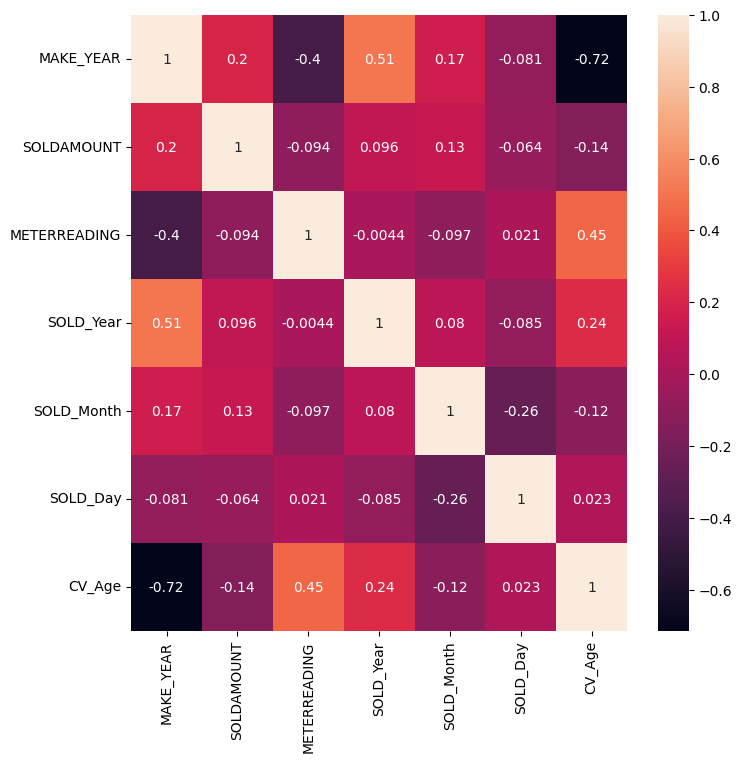

In [72]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,8))        # Size of the figure
sns.heatmap(df5.corr(),annot = True)
plt.show()

In [73]:
df5.columns

Index(['SOLD_DATE', 'MAKE_YEAR', 'Make_Clean', 'Model_Clean', 'Variant_Clean',
       'Fuel_Clean', 'SOLDAMOUNT', 'CV_State_Clean', 'METERREADING',
       'SELLER_SEGMENT', 'SOLD_Year', 'SOLD_Month', 'SOLD_Day', 'CV_Age',
       'MMV'],
      dtype='object')

In [74]:
df5.reset_index(drop=True,inplace =True)

In [75]:
df5.shape

(256486, 15)

In [76]:
df5['SELLER_SEGMENT'].value_counts()

BANK&NBFC    125983
OEM           55684
RETAIL        50572
INSURANCE     23874
LEASING         373
Name: SELLER_SEGMENT, dtype: int64

In [77]:
df5['CV_State_Clean'].value_counts()

TAMILNADU              60833
KARNATAKA              27949
TELANGANA              24408
ANDHRAPRADESH          21286
MAHARASHTRA            21226
KERALA                 11626
GUJARAT                 8115
RAJASTHAN               8033
HARYANA                 7565
UTTARPRADESH            6377
MADHYAPRADESH           6204
JHARKHAND               5567
PUNJAB                  4778
WESTBENGAL              4750
ODISHA                  3415
PONDICHERRY             3261
DELHI                   3187
BIHAR                   3173
HIMACHALPRADESH         2913
ASSAM                   2736
CHHATTISGARH            2189
UTTARAKHAND             1927
JAMMU&KASHMIR           1752
CHANDIGARH              1272
ARUNACHALPRADESH        1155
MANIPUR                 1129
MEGHALAYA               1113
DADARANDNAGARHAVELI     1109
DAMANANDDIU             1103
SIKKIM                  1088
LAKSHADWEEP             1080
NAGALAND                1064
GOA                     1046
TRIPURA                 1036
MIZORAM       

In [78]:
Model_data = df5.copy()

In [79]:
Model_data.to_csv('NEW_4W_JAN_To_May_Model_data_final_4W_NCS.csv')

In [80]:
Model_data

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age,MMV
0,2021-03-11,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC,2021,3,11,7,ASHOKLEYLAND_STILE_LE7STR
1,2017-03-06,2015,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC,2017,3,6,2,ASHOKLEYLAND_STILE_LE7STR
2,2019-05-12,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC,2019,5,12,5,ASHOKLEYLAND_STILE_LE7STR
3,2020-09-10,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL,2020,9,10,6,ASHOKLEYLAND_STILE_LE7STR
4,2020-10-15,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC,2020,10,15,6,ASHOKLEYLAND_STILE_LE7STR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256481,2023-05-03,2013,HYUNDAI,EON,DLITE,PETROL,150000,KARNATAKA,74412.000,RETAIL,2023,5,3,10,HYUNDAI_EON_DLITE
256482,2023-05-11,2017,MARUTISUZUKI,SWIFTDZIRE,VDI,DIESEL,520000,ANDHRAPRADESH,127273.000,RETAIL,2023,5,11,6,MARUTISUZUKI_SWIFTDZIRE_VDI
256483,2023-04-27,2014,MAHINDRA,THAR,A/C,DIESEL,385000,RAJASTHAN,49000.000,OEM,2023,4,27,9,MAHINDRA_THAR_A/C
256484,2023-04-20,2015,MARUTISUZUKI,SWIFT,VXI,PETROL,370000,KERALA,90930.000,OEM,2023,4,20,8,MARUTISUZUKI_SWIFT_VXI


In [81]:
Model_data_= Model_data[['MAKE_YEAR','Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','METERREADING','SOLDAMOUNT']]

In [82]:
Model_data_.columns

Index(['MAKE_YEAR', 'Make_Clean', 'Model_Clean', 'Variant_Clean', 'Fuel_Clean',
       'CV_State_Clean', 'METERREADING', 'SOLDAMOUNT'],
      dtype='object')

In [83]:
X=Model_data_.drop(['SOLDAMOUNT'],axis=1)
y=Model_data_[['SOLDAMOUNT']]

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [86]:
ohe=OneHotEncoder()
ohe.fit(X[['Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean']])

OneHotEncoder()

In [87]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean']),remainder='passthrough')

In [88]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['ASHOKLEYLAND', 'ASTONMARTIN', 'AUDI', 'BAJAJ', 'BENTLEY', 'BMW',
       'BUGATTI', 'CHEVROLET', 'CRYSLER', 'DAIMLERCHRYSLER-MERCEDES',
       'DATSUN', 'DC', 'FERRARI', 'FIAT', 'FORCEMOTORS', 'FORD',
       'HINDUSTAN', 'HONDA', 'HYUNDAI', 'ICML', 'JAGUAR', 'JEEP', 'KIA',
       'KIAMOTORS', 'L...
       'JAMMU&KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP',
       'MADHYAPRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN',
       'SIKKIM', 'TAMILNADU', 'TELANGANA', 'TRIPURA', 'UTTARAKHAND',
       'UTTARPRADESH', 'WESTBENGAL'], dtype=object)]),
                                 ['Make_Clean', 'Model_Clean', 'Variant_Clean',
                                  'Fuel_Clean', 'CV_State_Clean'])])

In [89]:
from sklearn import model_selection
from xgboost import XGBRegressor

In [90]:
regressor=XGBRegressor(max_depth=4,learning_rate=0.01,
                   n_estimators=2000,
                   objective='reg:squarederror',
                   booster='gbtree')

In [91]:
pipe=make_pipeline(column_trans,regressor)

In [92]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ASHOKLEYLAND', 'ASTONMARTIN', 'AUDI', 'BAJAJ', 'BENTLEY', 'BMW',
       'BUGATTI', 'CHEVROLET', 'CRYSLER', 'DAIMLERCHRYSLER-MERCEDES',
       'DATSUN', 'DC', 'FERRARI', 'FIAT', 'FORCEMOTORS', 'FORD',
       'HINDUSTAN', 'HONDA', 'HYUNDAI', 'ICML'...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.01, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=4, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [93]:
y_pred=pipe.predict(X_test)
y_pred

array([401547.38, 577011.9 , 275371.1 , ..., 169387.89, 117179.16,
       260147.97], dtype=float32)

In [94]:
y_train_pred=pipe.predict(X_train)
y_train_pred

array([  162847.27,   257566.56,   167414.75, ...,   150166.53,
       15389325.  ,   262955.53], dtype=float32)

In [95]:
r2_score(y_train,y_train_pred)

0.9739203120421093

In [96]:
r2_score(y_test,y_pred)

0.9701033470368355

In [97]:
import pickle

In [98]:
pickle.dump(pipe,open('NEW_4W_JAN_To_May_Model_data_final_4W_NCS.pkl','wb'))

In [99]:
Model_data.head()

,SOLD_DATE,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,METERREADING,SELLER_SEGMENT,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age,MMV
0,2021-03-11,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,96000,TAMILNADU,23344.000,BANK&NBFC,2021,3,11,7,ASHOKLEYLAND_STILE_LE7STR
1,2017-03-06,2015,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,23850.000,BANK&NBFC,2017,3,6,2,ASHOKLEYLAND_STILE_LE7STR
2,2019-05-12,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,117000,TAMILNADU,24200.000,BANK&NBFC,2019,5,12,5,ASHOKLEYLAND_STILE_LE7STR
3,2020-09-10,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,105000,TAMILNADU,24440.000,RETAIL,2020,9,10,6,ASHOKLEYLAND_STILE_LE7STR
4,2020-10-15,2014,ASHOKLEYLAND,STILE,LE7STR,DIESEL,125000,TAMILNADU,24790.000,BANK&NBFC,2020,10,15,6,ASHOKLEYLAND_STILE_LE7STR


In [100]:
pipe.predict(pd.DataFrame(columns=['MAKE_YEAR','Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','METERREADING'],data=np.array([2015,'ASHOKLEYLAND','STILE','LE7STR','DIESEL','TAMILNADU',23850.000]).reshape(1,7)))

array([333364.28], dtype=float32)

In [101]:
X_train_copy=X_train.copy()

In [102]:
X_train_copy['Predicted']=y_train_pred

In [103]:
X_train_copy['Actual']=y_train

In [104]:
X_train_copy['Predicted']

18182      162847.266
239386     257566.562
53754      167414.750
60523      604897.125
256434     175513.359
             ...     
119879     401547.375
103694     131915.516
131932     150166.531
146867   15389325.000
121958     262955.531
Name: Predicted, Length: 205188, dtype: float32

In [105]:
X_train_copy

,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,CV_State_Clean,METERREADING,Predicted,Actual
18182,2008,CHEVROLET,TAVERA,NEO310STR,DIESEL,ANDHRAPRADESH,123073.000,162847.266,83000
239386,2008,TOYOTA,INNOVA,2.5G,PETROL,GUJARAT,135178.000,257566.562,215000
53754,2009,HYUNDAI,I20,IGENSPORTSAT,PETROL,BIHAR,152790.000,167414.750,180000
60523,2018,HYUNDAI,XCENT,CRDISX,DIESEL,TELANGANA,51030.000,604897.125,350000
256434,2011,NISSAN,MICRA,XE,DIESEL,TELANGANA,134940.000,175513.359,72000
...,...,...,...,...,...,...,...,...,...
119879,2017,MARUTISUZUKI,SWIFTDZIRE,LDITOUR,CNG,KARNATAKA,17520.000,401547.375,300000
103694,2005,MARUTISUZUKI,OMNI,5SEATER,PETROL,TAMILNADU,21420.000,131915.516,45000
131932,2009,MARUTISUZUKI,SWIFT,VDI,DIESEL,KARNATAKA,105840.000,150166.531,248000
146867,2014,ROLLSROYCE,GHOST,SWB,PETROL,SIKKIM,76110.000,15389325.000,15630336


In [106]:
X_train_copy.head(20)

,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,CV_State_Clean,METERREADING,Predicted,Actual
18182,2008,CHEVROLET,TAVERA,NEO310STR,DIESEL,ANDHRAPRADESH,123073.000,162847.266,83000
239386,2008,TOYOTA,INNOVA,2.5G,PETROL,GUJARAT,135178.000,257566.562,215000
53754,2009,HYUNDAI,I20,IGENSPORTSAT,PETROL,BIHAR,152790.000,167414.750,180000
60523,2018,HYUNDAI,XCENT,CRDISX,DIESEL,TELANGANA,51030.000,604897.125,350000
256434,2011,NISSAN,MICRA,XE,DIESEL,TELANGANA,134940.000,175513.359,72000
47090,2016,HYUNDAI,EON,1.0KAPPAERAPLUS,PETROL,BIHAR,54210.000,356604.875,296000
106123,2012,MARUTISUZUKI,OMNI,5SEATER,PETROL,RAJASTHAN,74070.000,174272.703,77000
241610,2007,TOYOTA,INNOVA,2.5GE3BSIII8S,DIESEL,GUJARAT,54560.000,260147.969,99000
198369,2012,TATA,INDIGOECS,LXTDIBSIII,DIESEL,TAMILNADU,38670.000,117179.156,210000
123500,2016,MARUTISUZUKI,SWIFTDZIRE,TOURS,CNG,TELANGANA,41820.000,262955.531,280000


In [107]:
#MAPE=abs((X_train_copy['Actual']-X_train_copy['Predicted'])/X_train_copy['Actual']).mean()*100

In [108]:
#MAPE

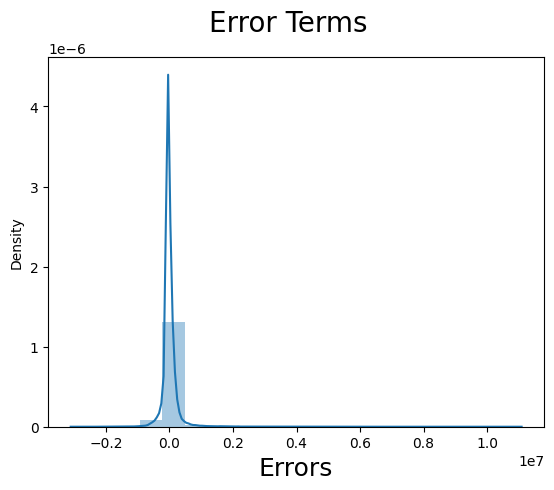

In [109]:
# Plot the histogram of the error terms
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.distplot((X_train_copy['Actual'] - X_train_copy['Predicted']), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

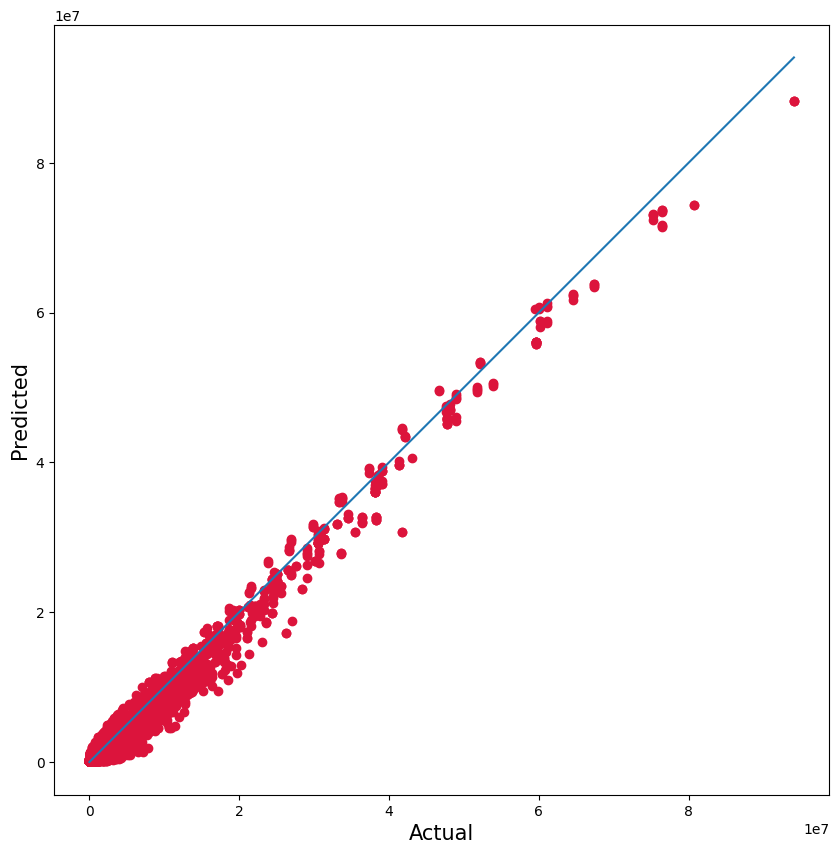

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_copy['Actual'], X_train_copy['Predicted'], c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(X_train_copy['Predicted']), max(X_train_copy['Actual']))
p2 = min(min(X_train_copy['Predicted']), min(X_train_copy['Actual']))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.show()

In [111]:
X_test_copy=X_test.copy()
X_test_copy['Predicted']=y_pred
X_test_copy['Actual']=y_test


In [112]:
X_test_copy['Predicted']

96981    401547.375
46310    577011.875
41255    275371.094
92427    135962.312
245961   715140.000
            ...    
168046   200146.156
241827   272814.000
247774   169387.891
185924   117179.156
242220   260147.969
Name: Predicted, Length: 51298, dtype: float32

In [113]:
X_test_copy.head(20)

,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,CV_State_Clean,METERREADING,Predicted,Actual
96981,2017,MARUTISUZUKI,EECO,5SEATER,CNG,GUJARAT,31800.000,401547.375,240000
46310,2017,HYUNDAI,CRETA,1.6CRDISX,DIESEL,KERALA,19620.000,577011.875,505000
41255,2014,HINDUSTAN,AMBASSADOR,CLASSIC1800ISZCNG,CNG,TAMILNADU,98010.000,275371.094,178052
92427,2006,MARUTISUZUKI,ALTO,LXI,PETROL,KERALA,103113.000,135962.312,62000
245961,2018,VOLKSWAGEN,AMEO,1.2MPIHIGHLINE,PETROL,ANDHRAPRADESH,43230.000,715140.000,465850
20075,2006,CHEVROLET,TAVERA,NEOSSD17STR,DIESEL,GUJARAT,147870.000,162847.266,30000
251423,2013,FORD,FIGO,1.2DURATECEXI,PETROL,RAJASTHAN,112496.000,238599.000,132000
167121,2009,TATA,INDICA,DLS,DIESEL,TAMILNADU,261876.000,109307.461,75000
88843,2010,MARUTISUZUKI,ALTOK10,LXI,CNG,MAHARASHTRA,133170.000,139282.828,70000
63962,2019,LANDROVER,DISCOVERY,SPORTSD4HSELUXURY7S,DIESEL,ANDHRAPRADESH,21330.000,4285905.500,4454680


In [114]:
vertical_concat = pd.concat([X_train_copy,X_test_copy ], axis=0)

In [115]:
vertical_concat['Diffrence']=vertical_concat['Predicted']-vertical_concat['Actual']

In [116]:
vertical_concat['%_diff']=((vertical_concat['Diffrence']/vertical_concat['Actual'])*100)

In [117]:
vertical_concat

,MAKE_YEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,CV_State_Clean,METERREADING,Predicted,Actual,Diffrence,%_diff
18182,2008,CHEVROLET,TAVERA,NEO310STR,DIESEL,ANDHRAPRADESH,123073.000,162847.266,83000,79847.266,96.202
239386,2008,TOYOTA,INNOVA,2.5G,PETROL,GUJARAT,135178.000,257566.562,215000,42566.562,19.798
53754,2009,HYUNDAI,I20,IGENSPORTSAT,PETROL,BIHAR,152790.000,167414.750,180000,-12585.250,-6.992
60523,2018,HYUNDAI,XCENT,CRDISX,DIESEL,TELANGANA,51030.000,604897.125,350000,254897.125,72.828
256434,2011,NISSAN,MICRA,XE,DIESEL,TELANGANA,134940.000,175513.359,72000,103513.359,143.769
...,...,...,...,...,...,...,...,...,...,...,...
168046,2015,TATA,INDICAEV2,LS,DIESEL,TELANGANA,35280.000,200146.156,72000,128146.156,177.981
241827,2011,TOYOTA,INNOVA,2.5GE3BSIII8S,DIESEL,JHARKHAND,120690.000,272814.000,270000,2814.000,1.042
247774,2010,VOLKSWAGEN,POLO,GTTSI,PETROL,PUNJAB,108960.000,169387.891,346060,-176672.109,-51.052
185924,2012,TATA,INDICAVISTA,AQUA1.4TDI,DIESEL,MAHARASHTRA,40213.000,117179.156,345000,-227820.844,-66.035


In [118]:
vertical_concat.to_csv('NEW_4W_JAN_To_May_Model_data_final_4W_NCS_Actual_vs_Predicted.csv')

In [119]:
vertical_concat.describe()

,MAKE_YEAR,METERREADING,Predicted,Actual,Diffrence,%_diff
count,256486.000,256486.000,256486.000,256486.000,256486.000,256486.000
mean,2011.513,96236.860,387985.781,388509.655,-523.884,68.887
std,3.822,67404.039,1704776.250,1820352.682,298448.107,257.209
min,2005.000,300.000,94880.477,145.000,-11011366.000,-92.735
25%,2008.000,52860.000,131915.516,80810.000,-47654.832,-18.576
50%,2011.000,85020.000,171969.297,162000.000,33364.281,22.282
75%,2014.000,122391.250,279829.312,305000.000,84383.203,96.097
max,2022.000,2682857.000,88257408.000,94050000.000,7450736.000,80713.211


In [120]:
vertical_concat.isnull().sum()

MAKE_YEAR         0
Make_Clean        0
Model_Clean       0
Variant_Clean     0
Fuel_Clean        0
CV_State_Clean    0
METERREADING      0
Predicted         0
Actual            0
Diffrence         0
%_diff            0
dtype: int64

In [121]:
MAPE_test=abs((X_test_copy['Actual']-X_test_copy['Predicted'])/X_test_copy['Actual']).mean()*100

In [122]:
MAPE_test

90.26760676162247

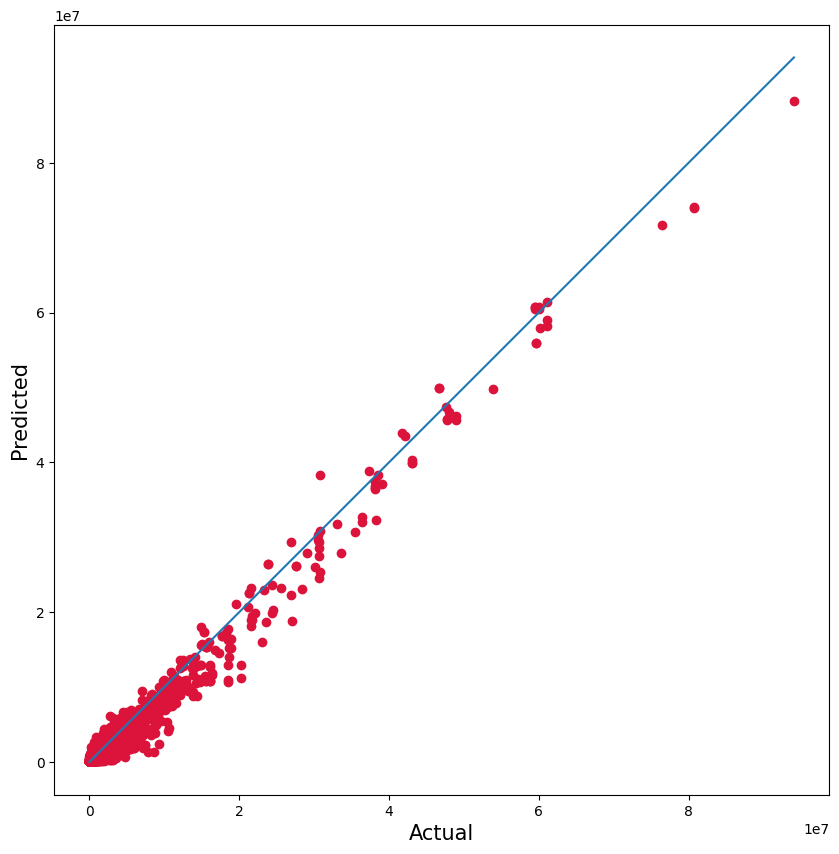

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(X_test_copy['Actual'], X_test_copy['Predicted'], c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(X_test_copy['Predicted']), max(X_test_copy['Actual']))
p2 = min(min(X_test_copy['Predicted']), min(X_test_copy['Actual']))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.show()

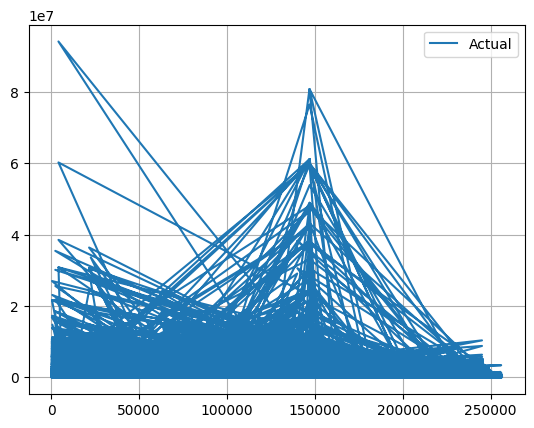

In [124]:
plt.plot(X_test_copy['Actual'],label='Actual')
#plt.plot(X_test_copy['Predicted'],label='Predicted')
plt.legend()
plt.grid()
plt.show()

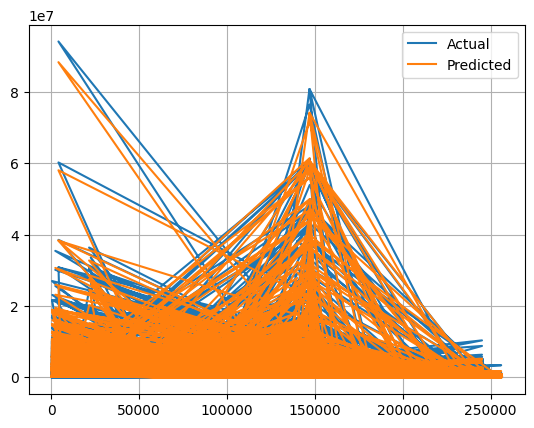

In [125]:
plt.plot(X_test_copy['Actual'],label='Actual')
plt.plot(X_test_copy['Predicted'],label='Predicted')
plt.legend()
plt.grid()
plt.show()

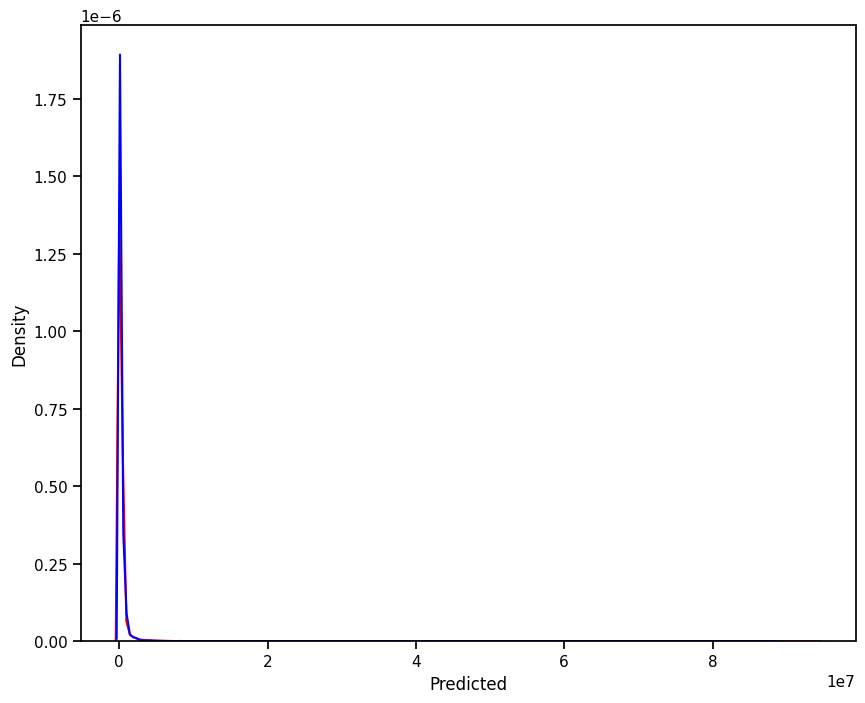

In [126]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax1 = sns.distplot(X_train_copy['Actual'], hist=False, color="r", label="Actual Value")
sns.distplot(X_train_copy['Predicted'], hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()